In [1916]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

## Columns Description

1. school — аббревиатура школы, в которой учится ученик 
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. studytime, granular	- ???
22. higher — хочет получить высшее образование (yes или no)
23. internet — наличие интернета дома (yes или no)
24. romantic — в романтических отношениях (yes или no)
25. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
26. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
27. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
28. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
29. absences — количество пропущенных занятий
30. score — баллы по госэкзамену по математике

In [1917]:
students.head(30)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [1918]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## ФУНКЦИИ

In [1919]:
# iqr - определяет межквартильный размах и границы выбросов
def iqr(column):
    median = students.loc[:, column].median()
    perc25 = students.loc[:, column].quantile(0.25)
    perc75 = students.loc[:, column].quantile(0.75)
    IQR = perc75 - perc25
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# info - выводит информацию о колонке
def info(column):
    display(pd.DataFrame(students.loc[:, column].value_counts(dropna=False)))
    display(students.loc[:, [column]].info())

# nominative_empty_remove - конвертирует пустые записи в NaN
def empty_remove(column):
    students.loc[:, column] = students.loc[:, column].apply(lambda x: None if pd.isnull(x)
                                                            else None if str.lower(x) == 'nan'
                                                            else None if x.strip == ''
                                                            else x.strip())

# get_boxplot - строит диаграмму boxplot распределения колонки по отношению к целевой переменной
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# mode_fill - заполняет пропуски наиболее часто встречающимся значением для переменной
def mode_fill(column):
    students.loc[:, column].fillna(
        students.loc[:, column].mode()[0], inplace=True)

# nm_fill - заполняет пропуски номинативной переменной значением "not mentioned"
def nm_fill(column):
    students.loc[:, column].fillna('not mentioned', inplace=True)

# other_fill - заполняет пропуски номинативной переменной значением "other"
def other_fill(column):
    students.loc[:, column].fillna('other', inplace=True)

# get_stat_dif - проверяет нулевую гипотезу о неразличимости распределения целевой переменной
# в зависимости от переданной переменной, с уровнем значимости 5%
def get_stat_dif(column):
    cols = []
    for i in students.loc[:, column].value_counts().index:
        if students.loc[:, column].value_counts()[i] > 1:
            cols.append(i)
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            return 'Найдены статистически значимые различия для колонки', column
            break
    return 'Cтатистически значимые различия для колонки', column, 'не найдены'

In [1920]:
test_na = students.dropna()
test_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               97 non-null     object 
 1   sex                  97 non-null     object 
 2   age                  97 non-null     int64  
 3   address              97 non-null     object 
 4   famsize              97 non-null     object 
 5   Pstatus              97 non-null     object 
 6   Medu                 97 non-null     float64
 7   Fedu                 97 non-null     float64
 8   Mjob                 97 non-null     object 
 9   Fjob                 97 non-null     object 
 10  reason               97 non-null     object 
 11  guardian             97 non-null     object 
 12  traveltime           97 non-null     float64
 13  studytime            97 non-null     float64
 14  failures             97 non-null     float64
 15  schoolsup            97 non-null     obje

Если выбросить строки, содержащие NaN, в датасете останется всего 97 значений. Придется искать методы заполнения пустых ячеек

## SCORE

In [1922]:
info('score')

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
45.0,27
70.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

In [1923]:
# Уберем из датасета записи, не содержащие значений целевой переменной Score
students.dropna(subset=['score'], inplace=True)

# Исследуем все переменные датасета на предмет пропусков, статистической значимости и необходимости их включения в модель

In [1924]:
# Создадим список переменных, которые мы будем включать в итоговую модель
parameters_list = []

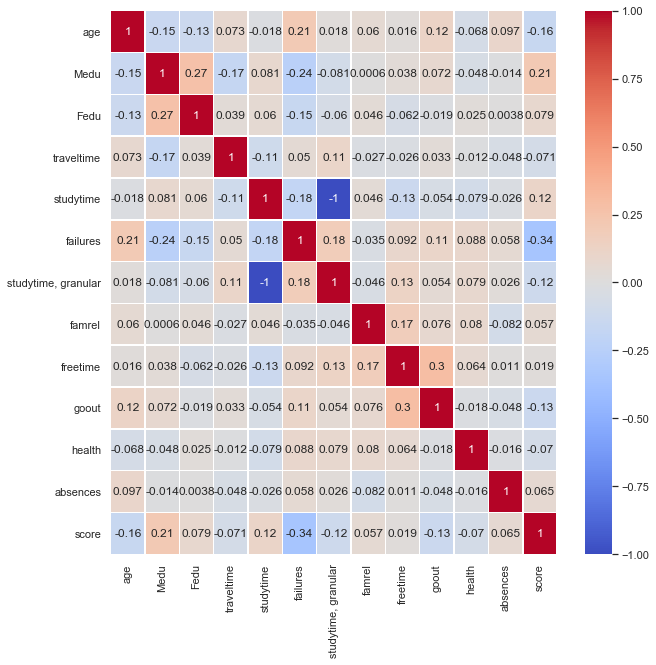

In [1925]:
# Посмотрим на корреляцию числовых переменных
sns.set()
correlation = students.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)

Наблюдаются:
- положительная корреляция между уровнем образования отца и матери.
- положительная корреляция между количеством внеучебных неудач и возрастом
- положительная корреляция между уровнем образования матери и итоговой оценкой
- положительная корреляция между количеством свободного времени и временем проводимым с друзьями
- отрицательная корреляция между количеством внеучебных неудач и уровнем образования отца и матери
- отрицательная корреляция между количеством внеучебных неудач и итоговой оценкой

## SCHOOL

In [1818]:
info('school')

,school
GP,344
MS,45


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

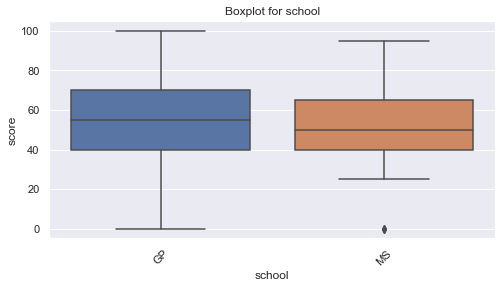

('Cтатистически значимые различия для колонки', 'school', 'не найдены')

In [1819]:
get_boxplot('school')
get_stat_dif('school')

Переменная категориальная, незаполненных ячеек 0. Но и интереса для нас не представляет, 
потому что в данном датасете подтверждается гипотеза о том, что распределение итоговых оценок по математике не зависит от школы.
Хотя более логичным выглядит предположение, что уровень подготовки учащихся должен зависеть от школы и в более широкой выборке могут наблюдаться статистически значимые различия в распределении оценок в зависимости от школы обучения.

## SEX

In [1820]:
info('sex')

,sex
F,204
M,185


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

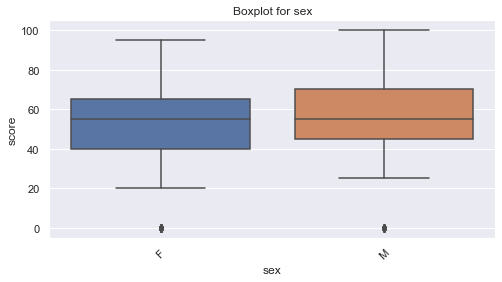

('Cтатистически значимые различия для колонки', 'sex', 'не найдены')

In [1821]:
get_boxplot('sex')
get_stat_dif('sex')

Переменная категориальная, незаполненных ячеек 0. Интереса не представляет, итоговые оценки от пола учеников не зависят. 

## AGE

In [1926]:
info('age')

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     389 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


None

In [1823]:
students.age.describe()

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [1824]:
iqr('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Устранять выбросы не кажется целесообразным, скорее всего просто в выборке есть студенты, по какой-то причине обучающиеся в более старшем возрасте, чем остальные.

In [1825]:
# students = students.loc[students.age.between(13, 19)]

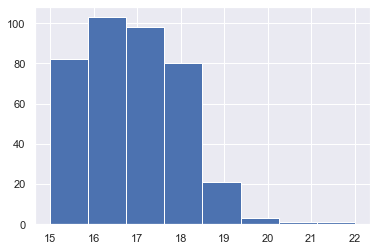

In [1826]:
students.age.hist(bins=8)

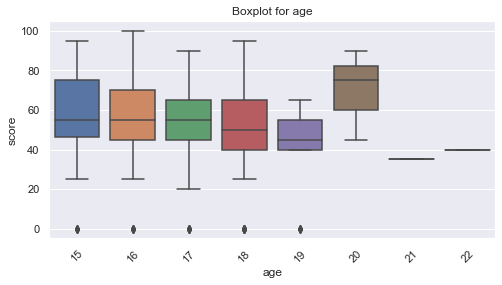

('Cтатистически значимые различия для колонки', 'age', 'не найдены')

In [1827]:
get_boxplot('age')
get_stat_dif('age')

Переменная категориальная, 7 возможных принимаемых значений. Незаполненных ячеек 0. Медианное значение 17.
В модель не включаем, так как статистически значимых отклонений распределения оценок в зависимости от возраста не обнаружено.
Если выкинуть из выборки пятерых студентов старше 19 лет, картина не меняется.

## ADDRESS

In [1828]:
info('address')

,address
U,291
R,83
NaN,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

Для заполнения пропусков, проверим, не зависит ли время в пути до школы от проживания студента в городе или в сельской местности

In [1829]:
display(pd.DataFrame(students.traveltime[students.address == 'U'].value_counts()))
display(pd.DataFrame(students.traveltime[students.address == 'R'].value_counts()))
display(pd.DataFrame(students.traveltime[students.address.isna()].value_counts()))

,traveltime
1.0,198
2.0,63
3.0,9
4.0,3


,traveltime
1.0,34
2.0,26
3.0,12
4.0,4


,traveltime
1.0,7
2.0,5


Явной зависимости времени в пути до школы от места проживания не наблюдаем, поэтому заполним пропуски наиболее часто встречающимся значением

In [1830]:
mode_fill('address')

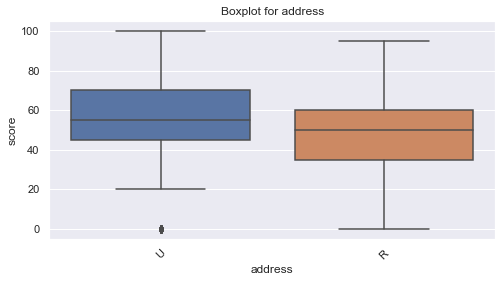

('Найдены статистически значимые различия для колонки', 'address')

In [1831]:
get_boxplot('address')
get_stat_dif('address')

Переменная категориальная, незаполненных ячеек было 15, стало 0. В модель включаем, так как есть статистически значимые отличия распределения итоговых оценок в зависимости от места проживания. 
На боксплоте тоже видно, что в среднем городские ученики получают более высокие оценки.

In [1832]:
parameters_list.append('address')

## FAMSIZE

In [1833]:
info('famsize')

,famsize
GT3,255
LE3,107
NaN,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

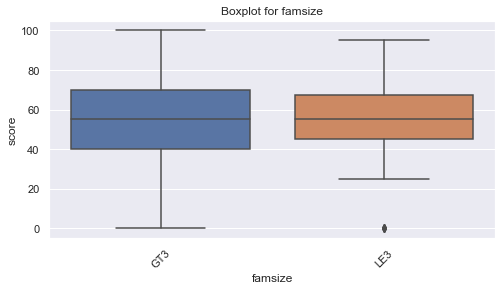

('Cтатистически значимые различия для колонки', 'famsize', 'не найдены')

In [1834]:
get_boxplot('famsize')
get_stat_dif('famsize')

Переменная категориальная, незаполненных ячеек 27. Из боксплотов и из подсчета т-статистики видно, что на итоговую оценку размер семьи не влияет. Можно лишь сказать, что у студентов из больших семей больше разброс оценок. В модель не включаем.
Примечание. Если заполнить пустые значения модой - результат не меняется.

## Pstatus

In [1835]:
info('Pstatus')

,Pstatus
T,308
NaN,45
A,36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  344 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

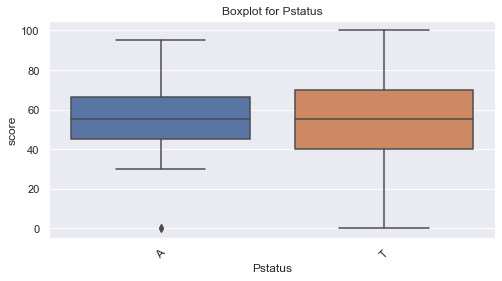

('Cтатистически значимые различия для колонки', 'Pstatus', 'не найдены')

In [1836]:
get_boxplot('Pstatus')
get_stat_dif('Pstatus')

In [1837]:
# если размер семьи больше 3, то предположим, что и статус проживания родителей = "вместе". Заполним пустые значения в Pstatus
#students.loc[((students['Pstatus'].isnull()) & (students['famsize'] == 'GT3')), 'Pstatus'] = 'T'

Переменная категориальная, незаполненные ячейки первоначально 45, гипотезой о заполнении пропусков на основании размера семьи снижено до 17, но на результат не влияет. Статистически значимых отличий в распределении итоговой оценки в зависимости от статуса проживания родителей не найдено.

## Medu

In [1838]:
info('Medu')

,Medu
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3
NaN,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

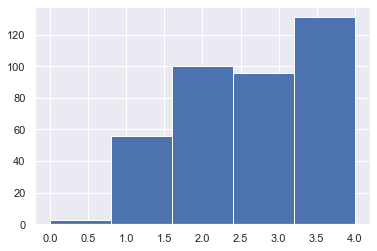

In [1839]:
students.Medu.hist(bins=5)

Переменная категориальная незаполненных ячеек 3. Заполним наиболее часто встречающимся значением

In [1840]:
mode_fill('Medu')

In [1841]:
info('Fedu')

,Fedu
2.0,105
3.0,94
4.0,88
1.0,75
NaN,24
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

In [1842]:
# Исправим одну ошибку в данных
students.Fedu = students.Fedu.replace(40.0, 4.0)

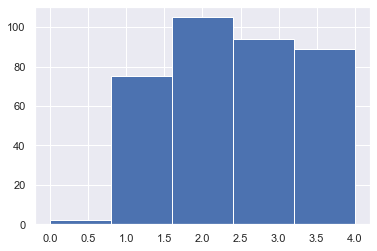

In [1843]:
students.Fedu.hist(bins=5)

Переменная категориальная. 5 возможных принимаемых значений. Незаполненных ячеек 24. Заполним столбец Fedu наиболее часто встречающимся значением. Матери более образованные чем отцы.

In [1844]:
mode_fill('Fedu')

Если посчитать корреляционную матрицу для числовых переменных датасета, то положительная корреляция между Medu и Fedu = 0.58.
Но выкидывать столбец не будем, а создадим новый - Pedu (уровень образования родителей) путем суммирования уровня образования отца и матери - Medu+Fedu

In [1845]:
students['Pedu'] = students.Medu + students.Fedu
#students['Pedu1'] = students[['Medu','Fedu']].max(axis=1) пробная гипотеза, не оправдала себя

In [1846]:
info('Pedu')

,Pedu
4.0,70
6.0,69
8.0,63
7.0,58
5.0,50
3.0,41
2.0,36
1.0,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pedu    389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

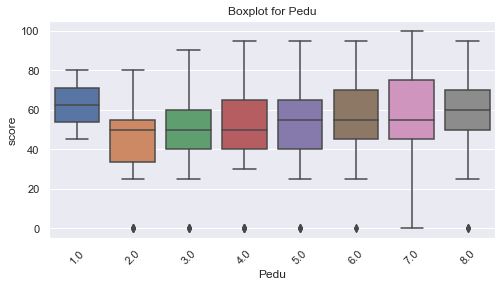

('Найдены статистически значимые различия для колонки', 'Pedu')

In [1847]:
get_boxplot('Pedu')
get_stat_dif('Pedu')

Переменная категориальная. 8 возможных принимаемых значений. Пропусков нет.
В модель включаем, т.к. обнаружено различие в распределении итоговой оценки в зависимости от уровня образования родителей.

In [1848]:
parameters_list.append('Pedu')

## Mjob Fjob

In [1849]:
info('Mjob')
info('Fjob')

,Mjob
other,127
services,98
at_home,58
teacher,55
health,32
NaN,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    370 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

,Fjob
other,194
services,99
NaN,36
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

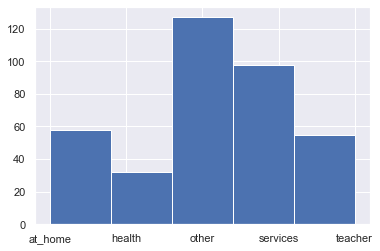

In [1850]:
students.Mjob.hist(bins=5)

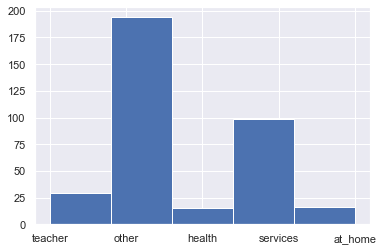

In [1851]:
students.Fjob.hist(bins=5)

In [1852]:
# Заполним пропуски значением "other"
other_fill('Mjob')
other_fill('Fjob')

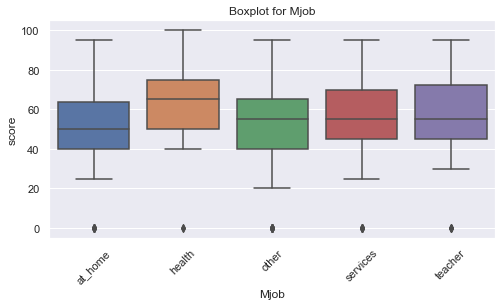

('Найдены статистически значимые различия для колонки', 'Mjob')

In [1853]:
get_boxplot('Mjob')
get_stat_dif('Mjob')

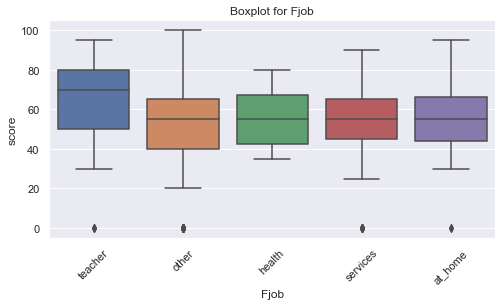

('Cтатистически значимые различия для колонки', 'Fjob', 'не найдены')

In [1854]:
get_boxplot('Fjob')
get_stat_dif('Fjob')

Переменные номинативные, 4 возможных принимаемых значения. Пропуски заполнены.
Очень странно, но работа матери влияет на оценку, а работа отца не влияет. Можно предположить, из за того, что в основном место работы отца - other. Если пропуски не заполнять, картина не меняется.


In [1855]:
parameters_list.append('Mjob')

## reason

,reason
course,135
reputation,102
home,101
other,34
NaN,17


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  372 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

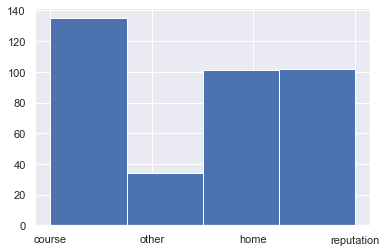

In [1856]:
info('reason')
students.reason.hist(bins=4)

In [1857]:
# mode_fill('reason')

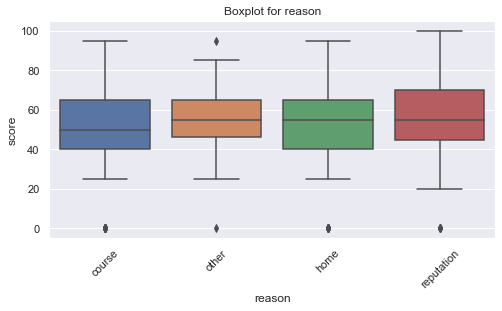

('Cтатистически значимые различия для колонки', 'reason', 'не найдены')

In [1858]:
get_boxplot('reason')
get_stat_dif('reason')

Переменная категориальная, 4 принимаемых значения. Незаполненных ячеек 17. В модель не берем на основании статистического исследования. При заполнении модой результаты не меняются. 

## guardian

,guardian
mother,248
father,86
NaN,31
other,24


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  358 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

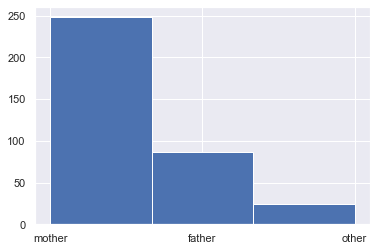

In [1859]:
info('guardian')
students.guardian.hist(bins=3)

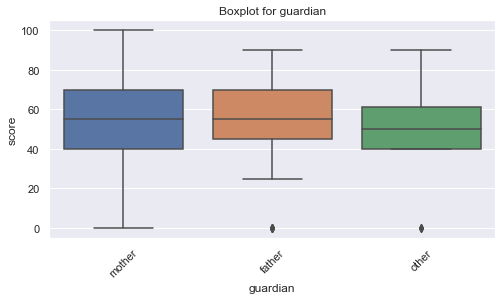

('Cтатистически значимые различия для колонки', 'guardian', 'не найдены')

In [1860]:
get_boxplot('guardian')
get_stat_dif('guardian')

In [1861]:
# mode_fill('guardian')

Переменная категориальная, 3 принимаемых значения. Незаполненных ячеек 31. На оценку не влияет. При заполнении модой картина не меняется. В модель не включаем.

## traveltime

,traveltime
1.0,239
2.0,94
NaN,28
3.0,21
4.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  361 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

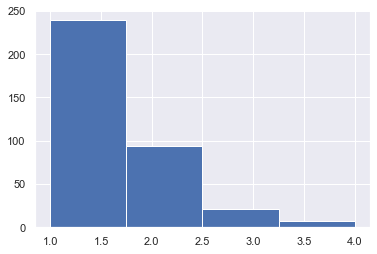

In [1862]:
info('traveltime')
students.traveltime.hist(bins=4)

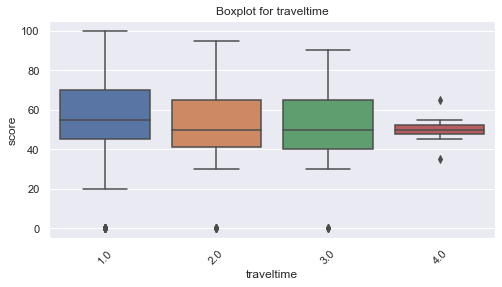

('Cтатистически значимые различия для колонки', 'traveltime', 'не найдены')

In [1863]:
get_boxplot('traveltime')
get_stat_dif('traveltime')

In [1864]:
# mode_fill('traveltime')

Переменная категориальная, 4 принимаемых значения. Незаполненных ячеек 28. На целевую переменную не влияет. При заполнении пропусков модой картина не меняется. В модель не включаем.

## studytime

,studytime
2.0,189
1.0,103
3.0,63
4.0,27
NaN,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

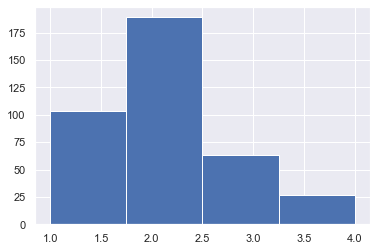

In [1865]:
info('studytime')
students.studytime.hist(bins=4)

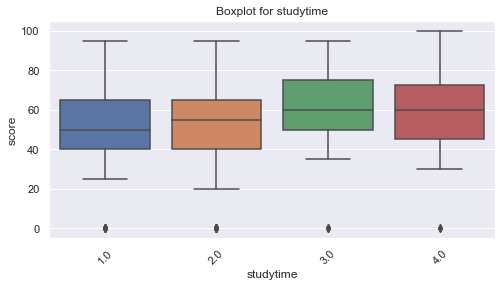

('Cтатистически значимые различия для колонки', 'studytime', 'не найдены')

In [1866]:
get_boxplot('studytime')
get_stat_dif('studytime')

Переменная количественная, незаполненных ячеек 7. Статистическое исследование не показывает различия в распределении целевой переменной в зависимости от времени дополнительных занятий, хотя глядя на боксплоты кажется, что с ростом времени доп. занятий растут и оценки. 

## failures

,failures
0.0,290
1.0,48
NaN,22
2.0,15
3.0,14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  367 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

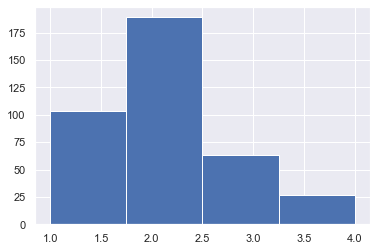

In [1867]:
info('failures')
students.studytime.hist(bins=4)

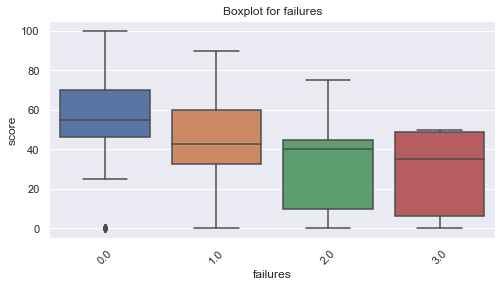

('Найдены статистически значимые различия для колонки', 'failures')

In [1868]:
get_boxplot('failures')
get_stat_dif('failures')

Переменная категориальная, 4 принимаемых значения, незаполненных ячеек 22. Переменная странная. Из описания не понятно что за "неудачи" и какое значение принимает, если неудач больше 3. Но на итоговую оценку влияет, видно что с ростом "неудач" падает оценка, поэтому заполним пропущенные значения модой и включим в модель.

In [1869]:
mode_fill('failures')

In [1870]:
parameters_list.append('failures')

## SCHOOLSUP & FAMSUP

,schoolsup
no,331
yes,49
NaN,9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  380 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

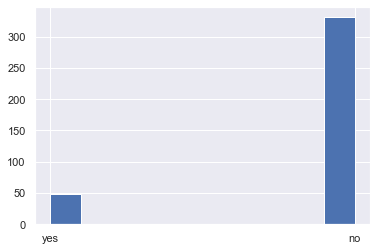

In [1871]:
info('schoolsup')
students.schoolsup.hist()


,famsup
yes,216
no,135
NaN,38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  351 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

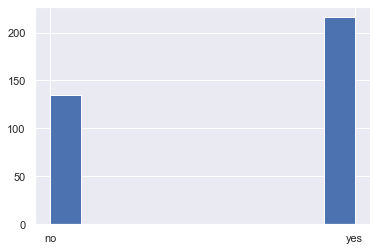

In [1872]:
info('famsup')
students.famsup.hist()

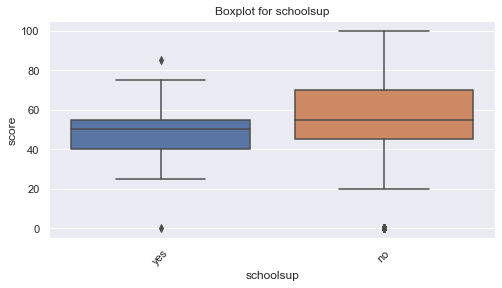

('Cтатистически значимые различия для колонки', 'schoolsup', 'не найдены')

In [1873]:
get_boxplot('schoolsup')
get_stat_dif('schoolsup')

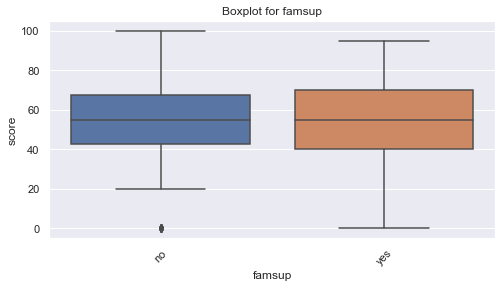

('Cтатистически значимые различия для колонки', 'famsup', 'не найдены')

In [1874]:
get_boxplot('famsup')
get_stat_dif('famsup')

Переменные категориальные, бинарные. Видно что большинство получает поддержку в семье, в школе большинство дополнительную поддержку не получает. Незаполненных ячеек 9 и 38. В модель не включаем, на основании исследования. Хотя глядя на боксплот можно предположить, что у неполучающих доп. поддержку в школе студентов в среднем оценка выше.

## PAID

,paid
no,197
yes,153
NaN,39


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    350 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

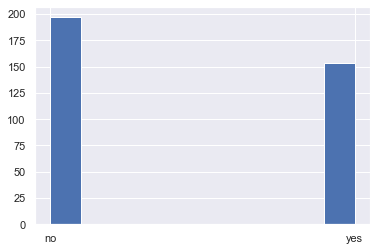

In [1875]:
info('paid')
students.paid.hist()

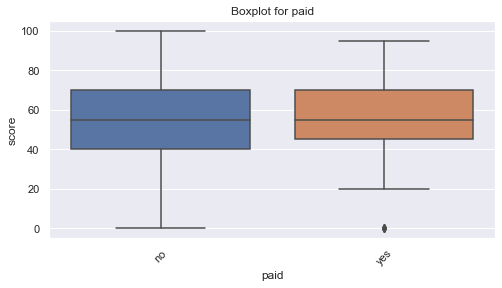

('Cтатистически значимые различия для колонки', 'paid', 'не найдены')

In [1876]:
get_boxplot('paid')
get_stat_dif('paid')

Переменная категориальная, бинарная, незаполненных ячеек 39. Парадоксально, но платные занятия на итоговую оценку не влияют. В модель не включаем.

## ACTIVITIES

,activities
yes,192
no,183
NaN,14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  375 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

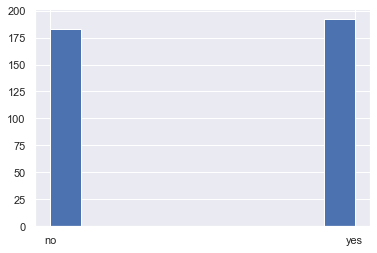

In [1877]:
info('activities')
students.activities.hist()

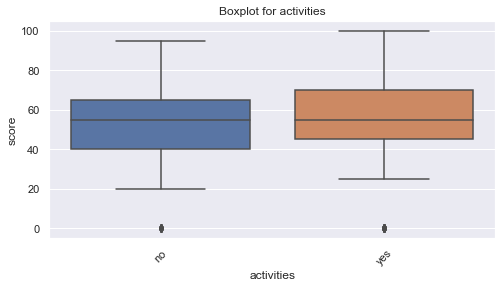

('Cтатистически значимые различия для колонки', 'activities', 'не найдены')

In [1878]:
get_boxplot('activities')
get_stat_dif('activities')

Переменная категориальная, бинарная, незаполненных ячеек 14. В модель не включаем. Статистически значимых различий в распределении итоговых оценок в зависимости от внеклассных занятий не наблюдается. 

## NURSERY

In [1879]:
info('nursery')

,nursery
yes,297
no,77
NaN,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

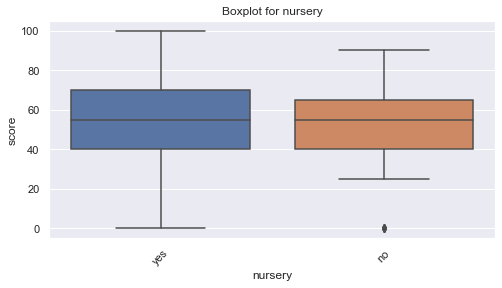

('Cтатистически значимые различия для колонки', 'nursery', 'не найдены')

In [1880]:
get_boxplot('nursery')
get_stat_dif('nursery')

Переменная категориальная, бинарная, пропусков 15. В модель не включаем. Статистически значимых различий в распределении итоговых оценок в зависимости от посещения детского сада до учебы в школе не наблюдается. 

## studytime, granular

In [1881]:
info('studytime, granular')

,"studytime, granular"
-6.0,189
-3.0,103
-9.0,63
-12.0,27
NaN,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


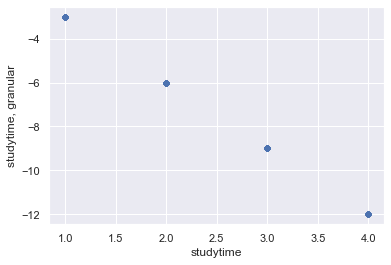

In [1882]:
students.plot(x = 'studytime', 
        y = 'studytime, granular', 
        kind = 'scatter', 
        grid = True, 
        )

Столбец полностью совпадает со столбцом studytime, только получен умножением на "-3". Это видно и из корреляционной матрицы. Удаляем из датасета

In [1883]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

## HIGHER

,higher
yes,350
NaN,20
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  369 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

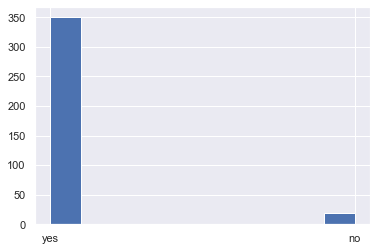

In [1884]:
info('higher')
students.higher.hist()

In [1885]:
# Заполним пропуски значением "не указано"
nm_fill('higher')

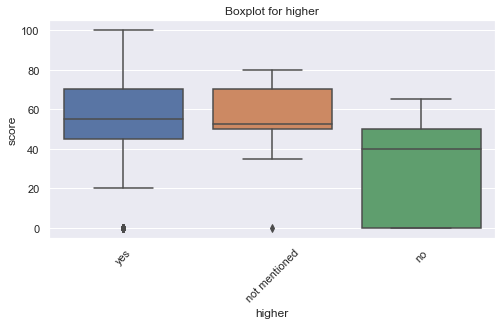

('Найдены статистически значимые различия для колонки', 'higher')

In [1886]:
get_boxplot('higher')
get_stat_dif('higher')

Переменная категориальная, бинарная, пропусков 20. Заполним пропуски значением Not mentioned, теперь переменная принимает три возможных значения. Большинство студентов планирует учиться дальше. И судя по всему больше стараются. В модель включаем. Наблюдаются статистически значимые различия в распределении итоговых оценок в зависимости от планов поступления студента в ВУЗ.

In [1887]:
parameters_list.append('higher')

## INTERNET

,internet
yes,300
no,55
NaN,34


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  355 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

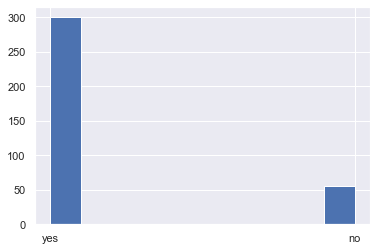

In [1888]:
info('internet')
students.internet.hist()

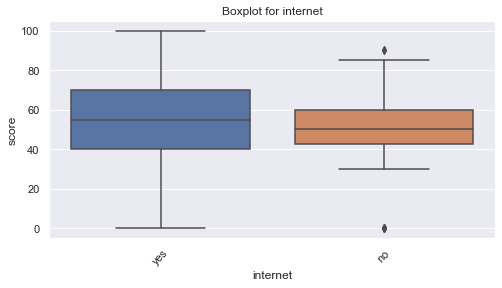

('Cтатистически значимые различия для колонки', 'internet', 'не найдены')

In [1889]:
get_boxplot('internet')
get_stat_dif('internet')

Переменная категориальная, бинарная, пропусков 34. В модель не включаем. Статистически значимых различий в распределении итоговых оценок в зависимости от наличия дома у студента доступа к интернету не наблюдается. 

## romantic

,romantic
no,235
yes,123
NaN,31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  358 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


None

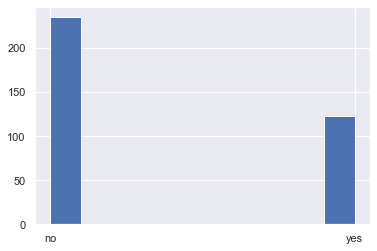

In [1890]:
info('romantic')
students.romantic.hist()

In [1891]:
# Заполним пропуски значением "Не указано"
nm_fill('romantic')

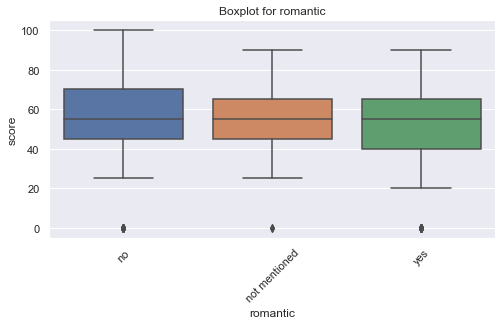

('Найдены статистически значимые различия для колонки', 'romantic')

In [1892]:
get_boxplot('romantic')
get_stat_dif('romantic')

Text(0.5, 1.0, 'Not mentioned')

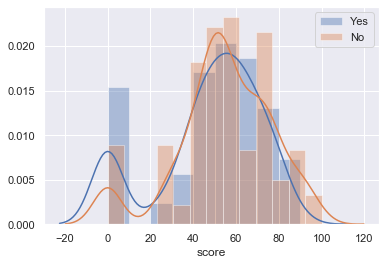

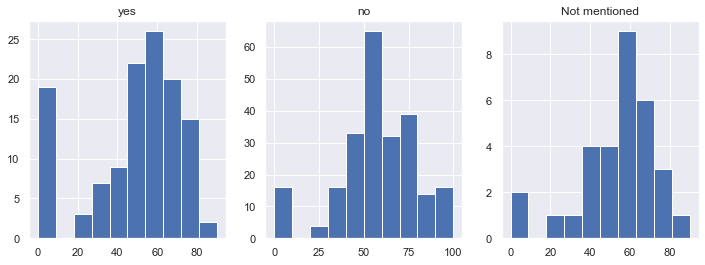

In [1893]:
sns.distplot(students.score[students.romantic == 'yes'], label='Yes')
sns.distplot(students.score[students.romantic == 'no'], label='No')
plt.legend()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(students.score[students.romantic == 'yes'])
axes[0].set_title('yes')

axes[1].hist(students.score[students.romantic == 'no'])
axes[1].set_title('no')

axes[2].hist(students.score[students.romantic == 'not mentioned'])
axes[2].set_title('Not mentioned')

In [1894]:
students.score[students.romantic == 'no'].describe()

count    235.000000
mean      54.574468
std       22.126042
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [1895]:
students.score[students.romantic == 'yes'].describe()

count    123.000000
mean      47.682927
std       24.564174
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max       90.000000
Name: score, dtype: float64

Переменная категориальная, бинарная, пропусков 31. Заполним пустые значения Not mentioned, теперь переменная принимает 3 значения. Удивительно, но средняя оценка по выборке студентов без романтических отношений выше средней оценки у студентов в отношениях. Отношения отвлекают от учебы! На графиках видно что распределение "No" смещено вправо. Переменную включаем в модель.

In [1896]:
parameters_list.append('romantic')

## FAMREL

,famrel
4.0,178
5.0,97
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  362 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

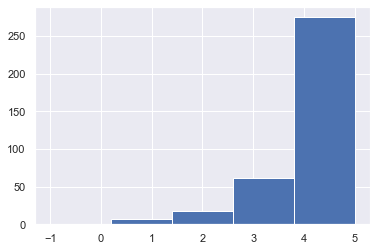

In [1897]:
info('famrel')
students.famrel.hist(bins=5)

In [1898]:
# исправим ошибку
students.famrel = students.famrel.replace(-1.0, 1.0)

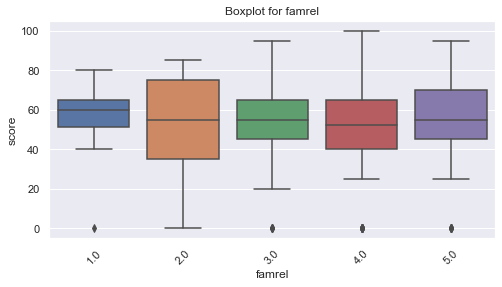

('Cтатистически значимые различия для колонки', 'famrel', 'не найдены')

In [1899]:
get_boxplot('famrel')
get_stat_dif('famrel')

Переменная категориальная, принимает 5 значений. В модель не включаем.

## FREETIME & GOOUT

In [1900]:
info('freetime')
info('goout')

,freetime
3.0,152
4.0,110
2.0,63
5.0,37
1.0,18
NaN,9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  380 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

,goout
3.0,126
2.0,101
4.0,81
5.0,51
1.0,23
NaN,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

C:\Users\maxsv\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\maxsv\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'GOOUT')

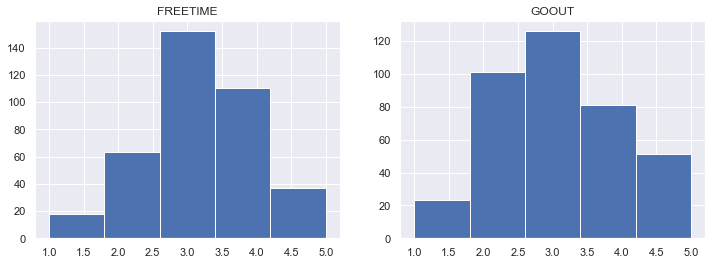

In [1927]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(students.freetime, bins=5)
axes[0].set_title('FREETIME')

axes[1].hist(students.goout, bins=5)
axes[1].set_title('GOOUT')

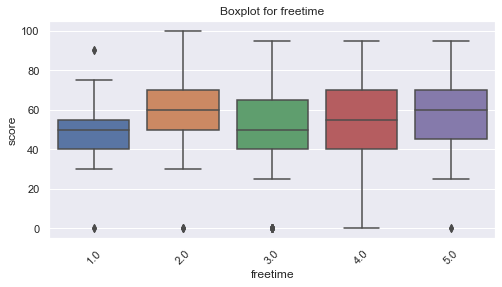

('Cтатистически значимые различия для колонки', 'freetime', 'не найдены')

In [1902]:
get_boxplot('freetime')
get_stat_dif('freetime')

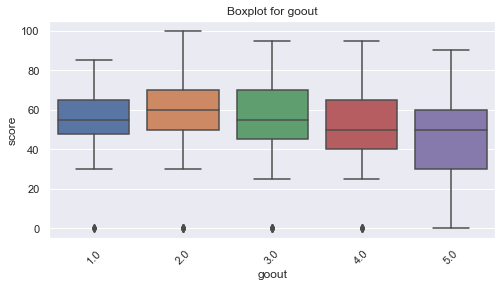

('Найдены статистически значимые различия для колонки', 'goout')

In [1903]:
get_boxplot('goout')
get_stat_dif('goout')

In [1904]:
# заполним пустые значения наиболее часто встречающимся
mode_fill('goout')

Между переменными есть положительная корреляция = 0.3, но на оценку влияет только goout. Видно, что чем больше студент гуляет с друзьями - тем хуже оценка. Включаем ее в модель

In [1905]:
parameters_list.append('goout')

## health

,health
5.0,137
3.0,88
4.0,60
1.0,47
2.0,42
NaN,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  374 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

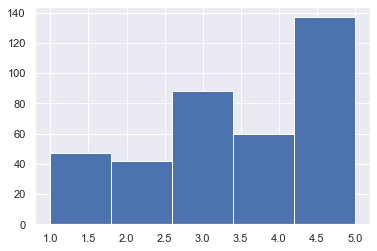

In [1906]:
info('health')
students.health.hist(bins=5)

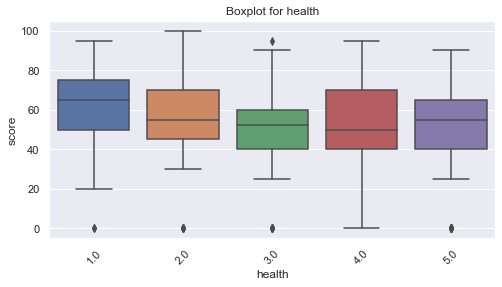

('Cтатистически значимые различия для колонки', 'health', 'не найдены')

In [1907]:
get_boxplot('health')
get_stat_dif('health')

Переменная категориальная, принимает 5 значений, 15 пропусков. В модель не включаем на основании статистического теста.

## absences

In [1908]:
info('absences')

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
NaN,11
16.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

In [1909]:
iqr('absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [1910]:
# устраним выбросы
students = students.loc[students.absences.between(0, 20)]

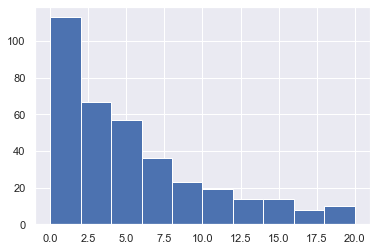

In [1911]:
students.absences.hist(bins=10)

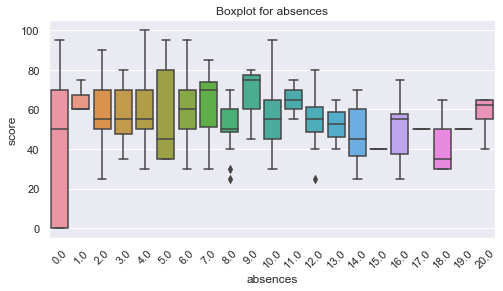

('Найдены статистически значимые различия для колонки', 'absences')

In [1912]:
get_boxplot('absences')
get_stat_dif('absences')

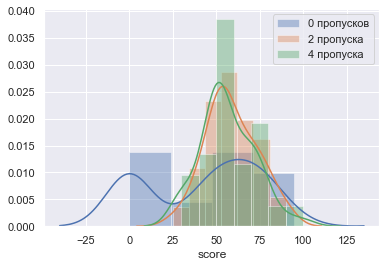

In [1913]:
sns.distplot(students.score[students.absences == 0], label='0 пропусков')
sns.distplot(students.score[students.absences == 2], label='2 пропуска')
sns.distplot(students.score[students.absences == 4], label='4 пропуска')
plt.legend()

Переменная количественная, в модель включаем, так как обнаружены различия в распределении оценок в зависимости от количества пропусков.

In [1914]:
parameters_list.append('absences')

In [1915]:
# Соберем датасет для модели
students_for_model = students.loc[:, parameters_list]
display(students_for_model.head())
display(students_for_model.info())

,address,Pedu,Mjob,failures,higher,romantic,goout,absences
0,U,8.0,at_home,0.0,yes,no,4.0,6.0
1,U,2.0,at_home,0.0,yes,no,3.0,4.0
2,U,2.0,at_home,3.0,yes,not mentioned,2.0,10.0
3,U,6.0,health,0.0,yes,yes,2.0,2.0
4,U,6.0,other,0.0,yes,no,2.0,4.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 394
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   361 non-null    object 
 1   Pedu      361 non-null    float64
 2   Mjob      361 non-null    object 
 3   failures  361 non-null    float64
 4   higher    361 non-null    object 
 5   romantic  361 non-null    object 
 6   goout     361 non-null    float64
 7   absences  361 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.4+ KB


None

Итоговый вывод: После статистического анализа в модель были включены переменные, значения которых оказывают статистически значимое влияние на распределение целевой переменной - итоговой оценки по математике.

В модель вошли 8 переменных:
- address — тип адреса ученика ('U' - городской, 'R' - за городом)
- Pedu - уровень образования родителей, получен суммированием исходным столбцов образования матери и отца Medu+Fedu (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- higher — хочет получить высшее образование (yes или no)
- romantic — в романтических отношениях (yes или no)
- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- absences — количество пропущенных занятий

В итоговом датасете содержится 361 запись. Пропущенных значений нет. Большинство пропусков в категориальных переменных заполнено наиболее часто встречающимся значением. Пропуски переменных, в которых респондент мог уклониться от ответа заполнены значением 'not mentioned'.
Для числовой переменной 'absences' устранены выбросы.